# OCT - EDA

Import Libraries

In [11]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import skimage
from skimage.transform import resize
from tqdm import tqdm
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split

import PIL
import PIL.Image
from pathlib import Path

import shutil

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
train_path = "./OCT2017 /train/"
train_path2 = "./OCT2017 /train2/"
test_path = "./OCT2017 /test/"
val_path = "./OCT2017 /val/"

In [21]:
list = os.listdir(train_path2)
print("Total Number of Classes Detected: ", len(list))

Total Number of Classes Detected:  4


In [20]:
image_count = len(glob(train_path2 + '*/*.jpeg'))
print("Total Number of Images in the Training set: ", (image_count))

Total Number of Images in the Training set:  10000


Create a dataframe from the training set

In [23]:
CLASSES = ["CNV","DME","DRUSEN","NORMAL"]

img_size = 224
n_channels = 3

def create_dataset():

  training_data = []

  for category in CLASSES:
    path = os.path.join(train_path2, category)
    class_num = CLASSES.index(category)
    for img in tqdm(os.listdir(path)):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
      h,w,d = img_array.shape
      new_array = cv2.resize(img_array, (img_size, img_size), n_channels)
      training_data.append([h,w,img_array, new_array, class_num])
    
  training_data = pd.DataFrame(training_data, columns = ["h","w","Original Image", "Resized Image", "Class Label"], index = None)
  training_data = training_data.sample(frac = 1).reset_index(drop=True)

  return training_data
    
df_train = create_dataset()

100%|██████████| 2500/2500 [00:08<00:00, 285.13it/s]


In [24]:
df_train.head(5)

,h,w,Original Image,Resized Image,Class Label
0,496,512,"[[[255, 255, 255], [251, 251, 251], [0, 0, 0],...","[[[254, 254, 254], [29, 29, 29], [42, 42, 42],...",0
1,512,512,"[[[34, 34, 34], [36, 36, 36], [44, 44, 44], [5...","[[[41, 41, 41], [30, 30, 30], [48, 48, 48], [3...",1
2,496,768,"[[[6, 6, 6], [23, 23, 23], [22, 22, 22], [13, ...","[[[28, 28, 28], [16, 16, 16], [4, 4, 4], [11, ...",0
3,496,768,"[[[2, 2, 2], [0, 0, 0], [0, 0, 0], [44, 44, 44...","[[[0, 0, 0], [41, 41, 41], [48, 48, 48], [43, ...",2
4,496,768,"[[[0, 0, 0], [18, 18, 18], [0, 0, 0], [31, 31,...","[[[19, 19, 19], [20, 20, 20], [9, 9, 9], [18, ...",3


In [25]:
df_train.isna().sum()

h                 0
w                 0
Original Image    0
Resized Image     0
Class Label       0
dtype: int64

In [26]:
df_train.describe()

,h,w,Class Label
count,10000.000000,10000.000000,10000.00000
mean,500.027200,656.422400,1.50000
std,6.944183,284.964188,1.11809
min,496.000000,384.000000,0.00000
25%,496.000000,512.000000,0.75000
50%,496.000000,512.000000,1.50000
75%,512.000000,768.000000,2.25000
max,512.000000,1536.000000,3.00000


In [27]:
df_train.shape

(10000, 5)

In [28]:
df_train.dtypes

h                  int64
w                  int64
Original Image    object
Resized Image     object
Class Label        int64
dtype: object

Countplot of the height of the images.

<AxesSubplot:xlabel='h', ylabel='count'>

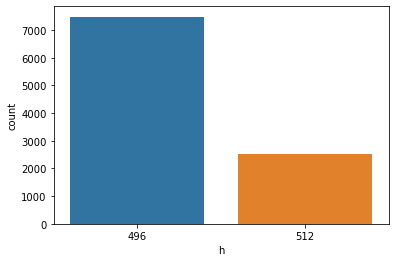

In [29]:
sns.countplot(df_train["h"])

Countplot of the weight of the images.

<AxesSubplot:xlabel='w', ylabel='count'>

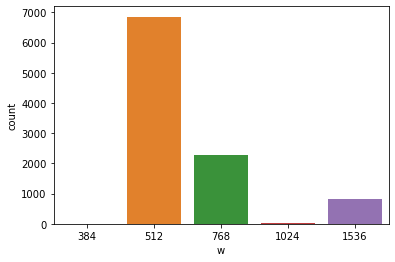

In [30]:
sns.countplot(df_train['w'])

Countplot of the classes. 

{0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}


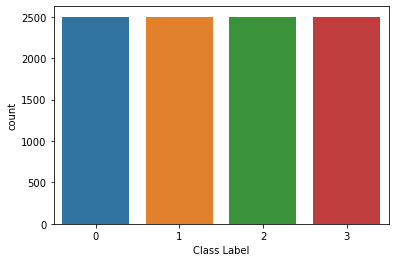

In [31]:
classes = {0: 'CNV', 1:'DME', 2:'DRUSEN', 3:'NORMAL'}

dist = df_train['Class Label']
sns.countplot(dist)
print(classes)

Display a random image. 

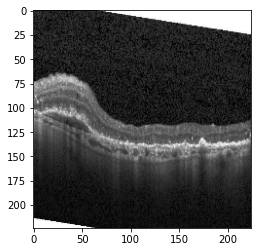

In [33]:
plt.imshow(df_train['Resized Image'][0])

Plot the histogram of the Pixel Intensity of the image. Check for outlier pixels. 

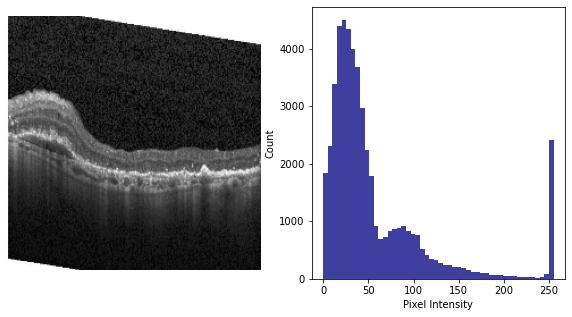

In [34]:
# Plot RGB Pixel Intensitites
def plotHistogram(x):

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(x)
    plt.axis('off')
    hist = plt.subplot(1,2,2)
    hist.set_ylabel('Count')
    hist.set_xlabel('Pixel Intensity')
    n_bins = 50
    plt.hist(x[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(x[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(x[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);


plotHistogram(df_train['Resized Image'][0])

Plot first 10 images from the dataset.

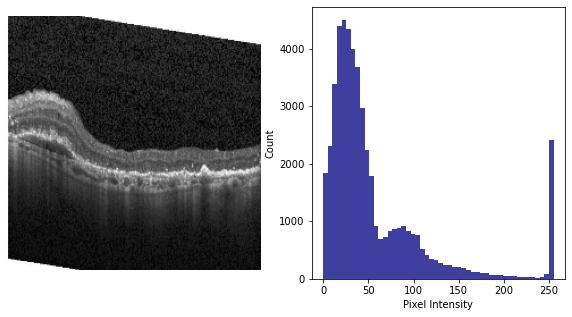

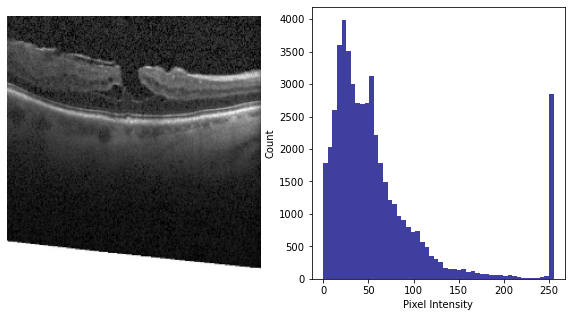

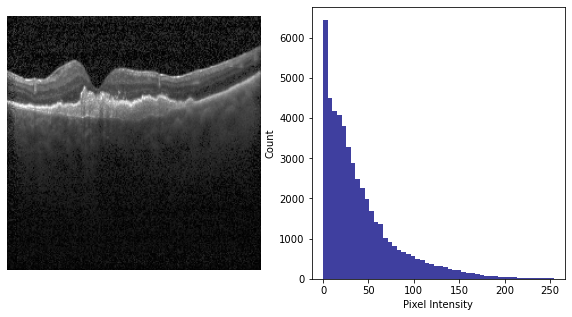

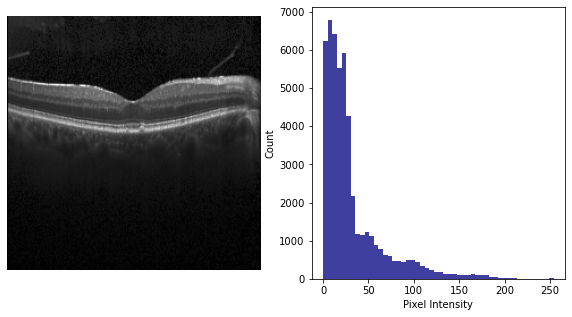

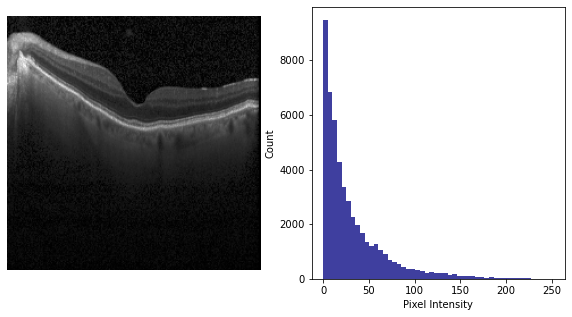

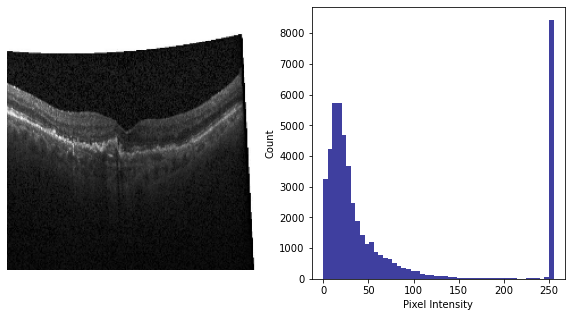

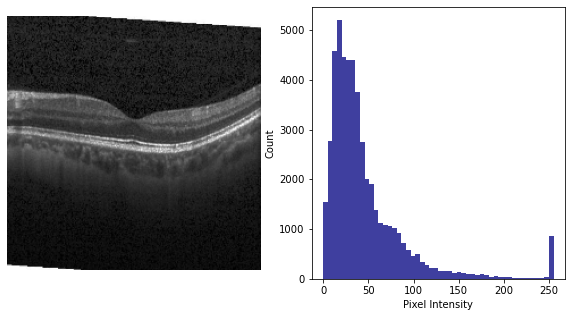

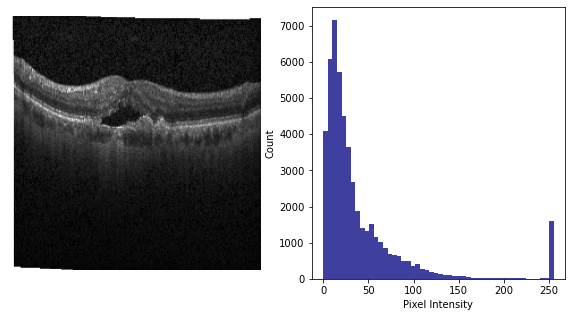

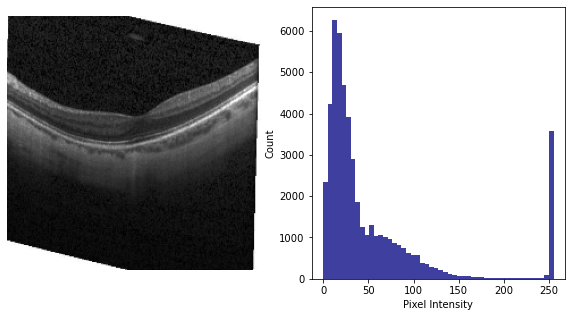

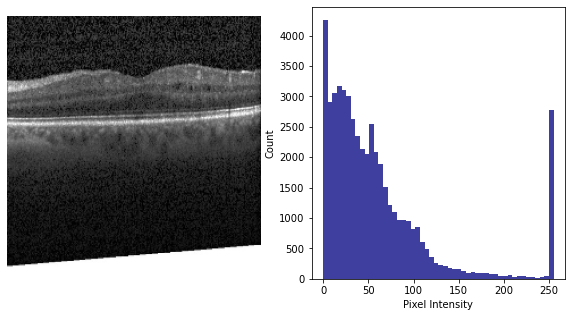

In [39]:
for i in range(0,10):
  plotHistogram(df_train['Resized Image'][i])

Plot 10 images from the middle of the dataset.

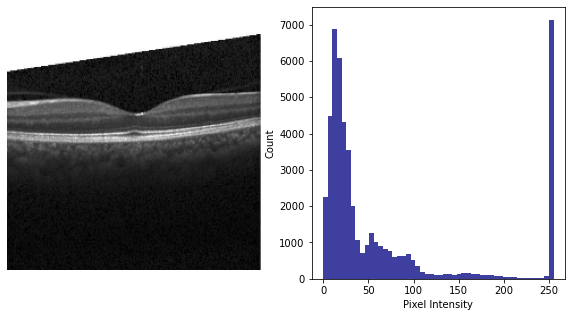

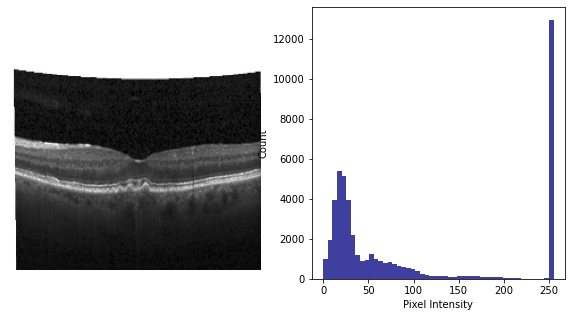

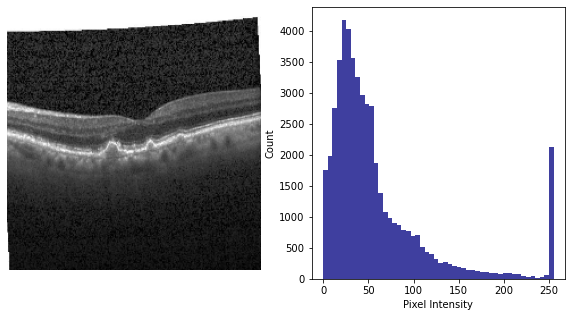

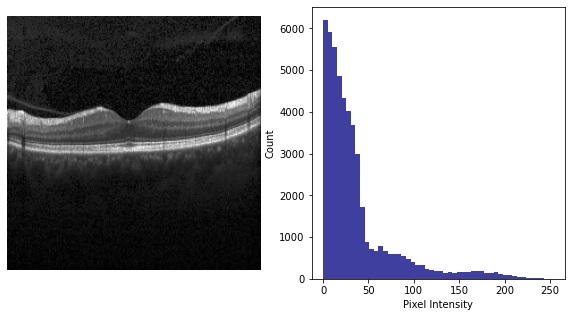

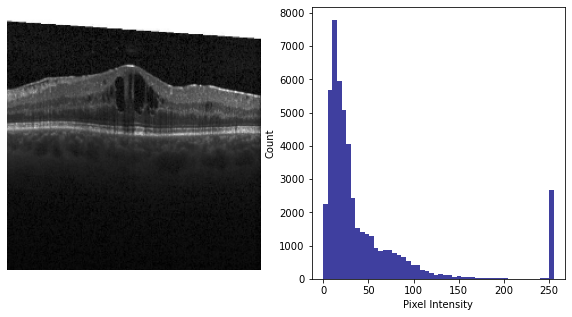

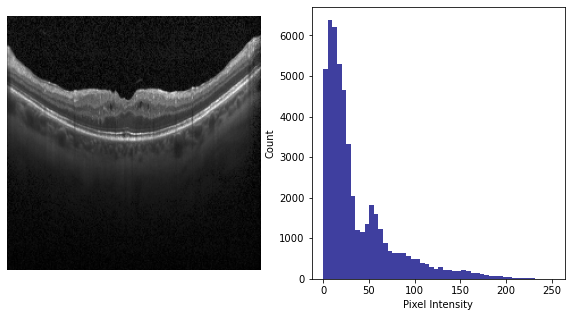

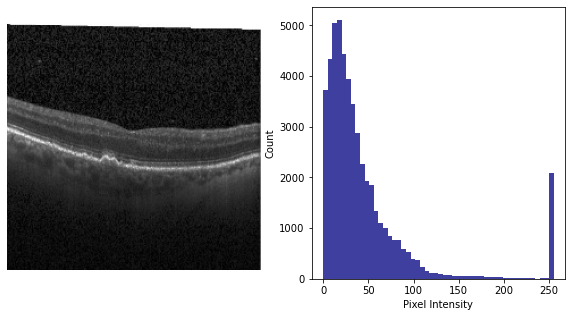

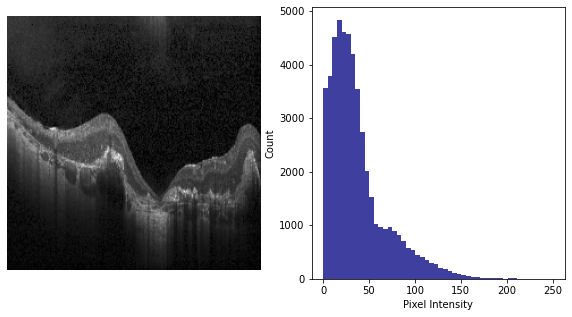

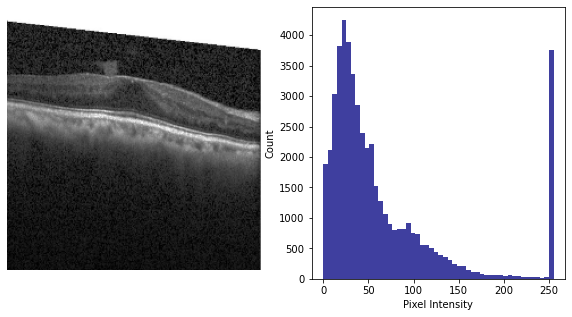

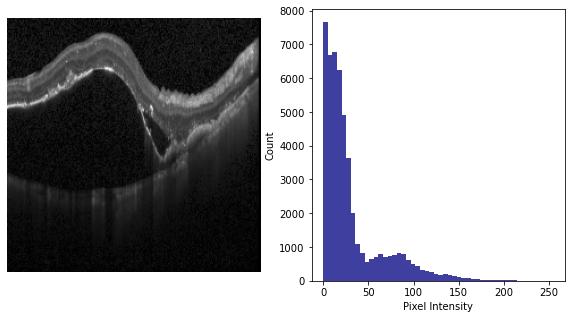

In [36]:
med = int(len(df_train)/2)

for i in range(med, med+10):
  plotHistogram(df_train['Resized Image'][i])

Plot last 10 images of the dataset. 

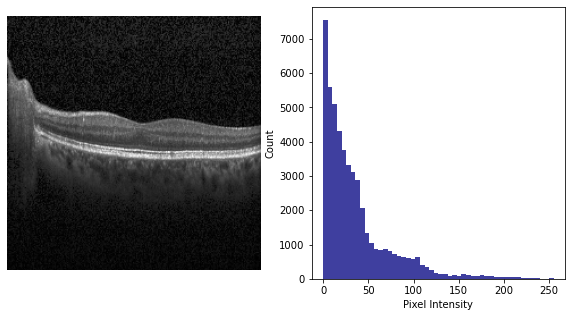

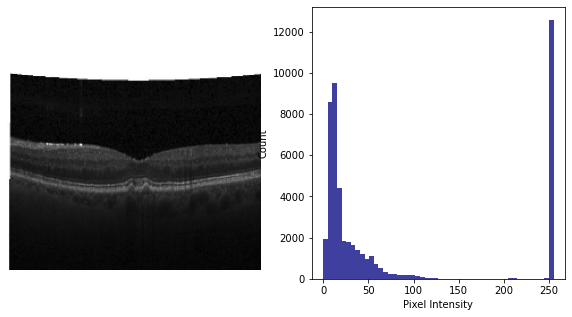

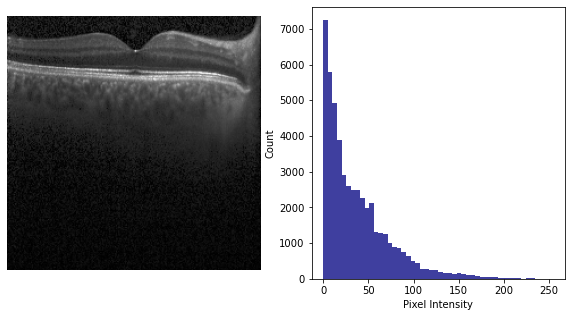

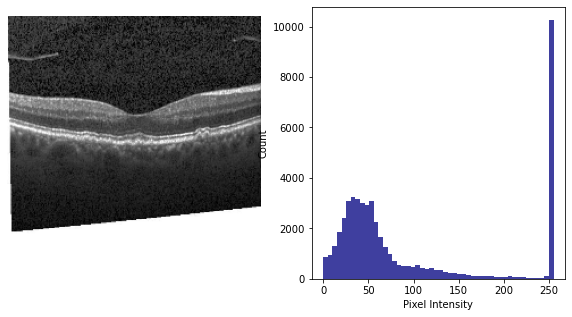

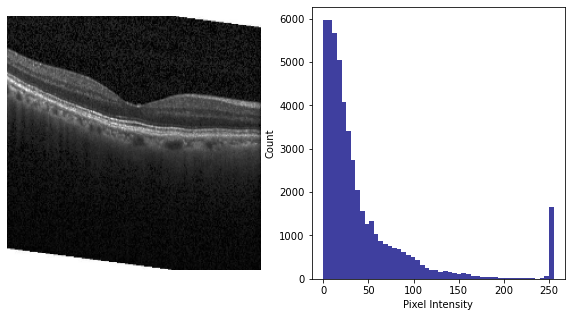

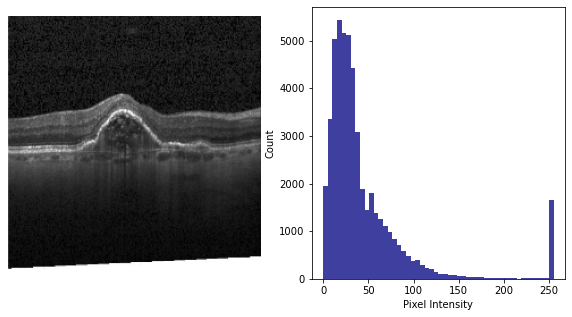

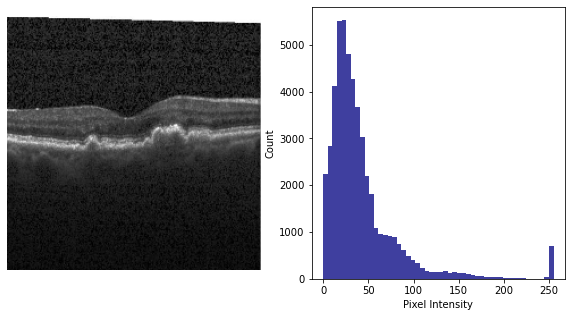

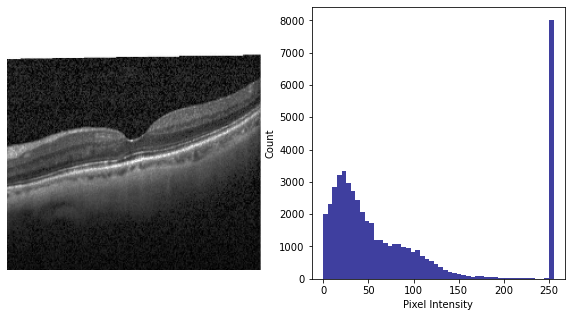

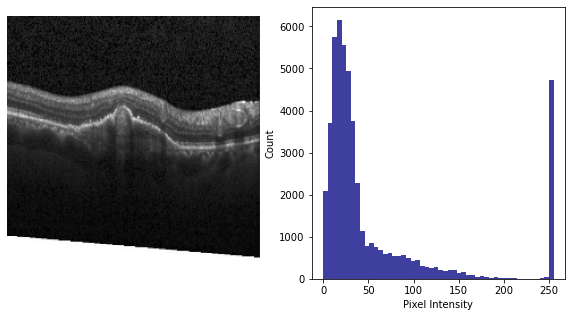

In [40]:
end = int(len(df_train))

for i in range(end-9, end):
  plotHistogram(df_train['Resized Image'][i])